In [1]:
import pandas as pd
import numpy as np 


In [2]:
df = pd.read_csv("data.csv")
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df["diagnosis"] = df['diagnosis'].map({'B':0,'M':1}).astype(int)


In [8]:
X = df.iloc[:,2:32].values
Y = df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)


550    0
466    0
166    0
312    0
560    0
      ..
184    1
31     1
373    1
140    0
7      1
Name: diagnosis, Length: 455, dtype: int32

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)


[[-0.91622235  0.48253519 -0.95402445 ... -1.74722264 -0.67529038
  -0.97527427]
 [-0.27113722  0.31300995 -0.23590787 ...  0.09213975 -0.50773824
  -0.10688474]
 [-0.93319827 -2.21383245 -0.94333697 ... -1.03032297 -1.26252076
  -0.36762117]
 ...
 [ 1.85085331 -0.46359891  1.77087241 ...  1.54213668 -0.30667566
  -0.72112487]
 [-1.23367213 -1.69609321 -1.25286289 ... -1.74722264  0.35714998
  -0.11950987]
 [-0.10986594  0.33362788 -0.06244182 ...  0.67618792  0.50236184
   1.72430833]]
[[1.959e+01 1.815e+01 1.307e+02 ... 2.247e-01 3.643e-01 9.223e-02]
 [2.009e+01 2.386e+01 1.347e+02 ... 1.923e-01 3.294e-01 9.469e-02]
 [1.234e+01 1.495e+01 7.829e+01 ... 4.793e-02 2.298e-01 5.974e-02]
 ...
 [1.459e+01 2.268e+01 9.639e+01 ... 1.105e-01 2.258e-01 8.004e-02]
 [1.106e+01 1.483e+01 7.031e+01 ... 5.556e-02 2.590e-01 9.158e-02]
 [1.300e+01 2.182e+01 8.750e+01 ... 2.060e-01 4.378e-01 1.072e-01]]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [44]:
models = []
models.append(("LR",LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("KC",KNeighborsClassifier()))
models.append(("G8",GaussianNB()))
models.append(("svc",SVC(gamma=0.025,C=5)))

results = []
names = []
res = []
for name , model in models:
    kfold = StratifiedKFold(n_splits=10,random_state=None)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)',(name,cv_results.mean(),cv_results.std()))



%s: %f (%f) ('LR', 0.9714975845410627, 0.01713716622826743)
%s: %f (%f) ('LDA', 0.947391304347826, 0.03805858913148607)
%s: %f (%f) ('DTC', 0.9296135265700484, 0.02938298325579994)
%s: %f (%f) ('KC', 0.9670048309178745, 0.026582386243885238)
%s: %f (%f) ('G8', 0.9406280193236715, 0.02962219415911252)
%s: %f (%f) ('svc', 0.9802898550724638, 0.018193778036541017)


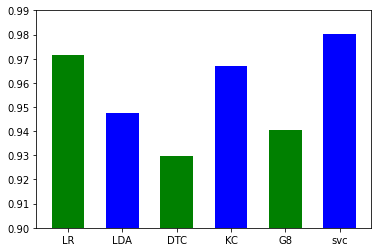

In [46]:
import matplotlib.pyplot as plt 
plt.ylim(.900,.990)
plt.bar(names,res,color=('green','blue'),width=0.6)
plt.show()